## Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\zhaoshuting\Documents\研究生\Module 3\Machine Learning in Finance\Fake Job\3.data preprocessing\data for preprocessing.csv',engine ='python')

In [3]:
df.head()

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,salary_range_min,salary_range_max,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,-1,-1,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,-1,-1,0
2,Our passion for improving quality of life thro...,THE COMPANY: ESRI ??Environmental Systems Rese...,"EDUCATION:?Bachelor?? or Master?? in GIS, busi...",Our culture is anything but corporate??e have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
3,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
4,,Job OverviewApex is an environmental consultin...,,,0,0,0,Unknown,Unknown,Unknown,-1,-1,0


### 1. Feature preprocessing

To avoid text analysis and simplify the model, we use the length of 'company_profile'，'description'，'requirements'，'benefits' to replace the text.

In [4]:
df.company_profile=df.company_profile.str.len()
df.description=df.description.str.len()
df.requirements=df.requirements.str.len()
df.benefits=df.benefits.str.len()
df.head()

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,salary_range_min,salary_range_max,fraudulent
0,885,905,852,1,0,1,0,Other,Internship,Unknown,-1,-1,0
1,1286,2077,1433,1292,0,1,0,Full-time,Not Applicable,Unknown,-1,-1,0
2,614,2600,1429,782,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
3,1628,1520,757,21,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
4,1,3418,1,1,0,0,0,Unknown,Unknown,Unknown,-1,-1,0


In [5]:
df.required_education.value_counts()

Unknown                              7915
Bachelor's Degree                    5090
High School or equivalent            2039
Unspecified                          1379
Master's Degree                       406
Associate Degree                      271
Certification                         170
Some College Coursework Completed     101
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

The required education is ordinal feature, so we can map them with integer.

In [6]:
edu_mapping={'Unknown':0,'Unspecified':0,'Some High School Coursework':1,
             'High School or equivalent':2,'Vocational':3,'Vocational - HS Diploma':3,
             'Vocational - Degree':3,'Certification':4,'Associate Degree':5,
             'Some College Coursework Completed':6,"Bachelor's Degree":7,
             'Professional':8,"Master's Degree":9,'Doctorate':10}
df.required_education=df.required_education.map(edu_mapping)

In [7]:
df.required_experience.value_counts()

Unknown             6907
Mid-Senior level    3763
Entry level         2666
Associate           2237
Not Applicable      1086
Director             385
Internship           379
Executive            139
Name: required_experience, dtype: int64

Required experience is processed just like required education.

In [8]:
exp_mapping={'Unknown':0,'Not Applicable':0,'Entry level':1,'Internship':2,'Associate':3,'Mid-Senior level':4,'Director':5,'Executive':5}
df.required_experience=df.required_experience.map(exp_mapping)

In [9]:
df.employment_type.value_counts()

Full-time    11416
Unknown       3392
Contract      1505
Part-time      792
Temporary      240
Other          217
Name: employment_type, dtype: int64

The employment type is nominal features. We can perform one-hot encoding.

In [10]:
df2=pd.get_dummies(df,drop_first=True,dtype=int)
df2

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,required_experience,required_education,salary_range_min,salary_range_max,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unknown
0,885,905,852,1,0,1,0,2,0,-1,-1,0,0,1,0,0,0
1,1286,2077,1433,1292,0,1,0,0,0,-1,-1,0,1,0,0,0,0
2,614,2600,1429,782,0,1,0,4,7,-1,-1,0,1,0,0,0,0
3,1628,1520,757,21,0,1,1,4,7,-1,-1,0,1,0,0,0,0
4,1,3418,1,1,0,0,0,0,0,-1,-1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,1708,1442,1273,857,0,1,1,4,0,-1,-1,0,1,0,0,0,0
17558,2270,1216,721,511,0,1,1,4,7,-1,-1,0,1,0,0,0,0
17559,228,1291,1235,1,0,0,0,0,0,-1,-1,0,1,0,0,0,0
17560,1,506,502,216,0,0,1,0,8,-1,-1,0,0,0,0,0,0


### 2. Train-test split

In [11]:
X0=df2.values
X,y=X0[:,:-1],X0[:,-1]

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [13]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### 3.Feature selection

There are 17 features and one-hot encoding may cause multicollinearity. So we need select important features. We use KNN to select features.

In [14]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

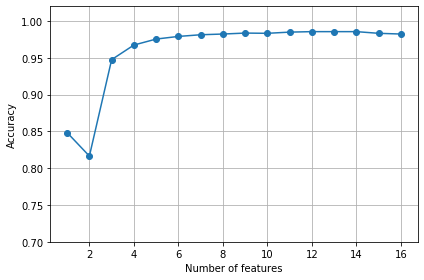

In [20]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [16]:
k6 = list(sbs.subsets_[10])
print(df2.columns[1:][k6])

Index(['required_education', 'salary_range_min', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown'],
      dtype='object')


In [17]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k6], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k6], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k6], y_test))

Training accuracy: 0.9842186610266005
Test accuracy: 0.9777946479407857
Training accuracy: 0.9789310989994305
Test accuracy: 0.9772252799392674


In [18]:
df3=df2[['required_education', 'salary_range_min', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown','fraudulent']]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['required_education', 'salary_range_min', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown','fraudulent']

sns.pairplot(df2[cols], height=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [ ]:
import numpy as np


cm = np.corrcoef(df2[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 3},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()
# The cm graph activX temporary breaks down, so I don't know why it looks like this.

In [19]:
outputpath=r'C:\Users\zhaoshuting\Documents\研究生\Module 3\Machine Learning in Finance\Fake Job\3.data preprocessing\final data.csv'
df3.to_csv(outputpath,sep=',',index=False,header=True)